# Comprehensive Analysis of the GATK HaplotypeCaller Workflow

**Goal of this Notebook:** This notebook performs the final, exhaustive analysis of the candidate variants generated by the GATK HaplotypeCaller pipeline. The workflow is divided into two main parts:

1.  **Analysis of the Proportional Filtering Experiment:** We will first visualize how the number of strict candidates (`4/4` vs `0/4`) changes as the technical filtering stringency increases. This allows us to select and justify an optimal threshold for the final analysis.
2.  **In-depth Analysis of the Optimal Candidate Set (15%):**
    * We will first display the list of variants with `HIGH` or `MODERATE` functional impact.
    * We will then perform a detailed Variant Allele Frequency (VAF) analysis on these top candidates to investigate their presence across all four mutant replicates.

In [7]:
# --- 1. SETUP AND LIBRARY IMPORTS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
import io
from matplotlib_venn import venn2, venn3

# Set a visual style for the plots
sns.set_theme(style="whitegrid")

# --- Configuration based on your file structure ---
EXP_DIR = '/data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis'
GATK_WORKFLOW_DIR = os.path.join(EXP_DIR, 'GATK_HaplotypeCaller_workflow')

STRICT_CANDIDATE_DIR = os.path.join(GATK_WORKFLOW_DIR, '03_strict_candidate_search')
FINAL_RESULTS_DIR = os.path.join(GATK_WORKFLOW_DIR, '05_final_results')
NOTEBOOK_DATA_DIR = os.path.join(GATK_WORKFLOW_DIR, 'notebook_data')
NOTEBOOK_OUTPUT_DIR = os.path.join(EXP_DIR, 'final_comparison_report')
os.makedirs(NOTEBOOK_OUTPUT_DIR, exist_ok=True)

print("Setup complete. Directories and variables are defined.")

Setup complete. Directories and variables are defined.


## Part 1: Analysis of the Proportional Filtering Experiment

First, we will load the `strict_candidate_summary.txt` file to visualize the impact of our filtering strategy. This justifies our choice of the 15% threshold for the detailed analysis that follows.

--- GATK Filtering Experiment Summary ---
 Threshold_Percent  Final_Candidate_Count
                 3                    284
                 5                    276
                 7                    266
                10                    244
                15                    224

Plot saved correctly to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/gatk_filtering_threshold_effect.png


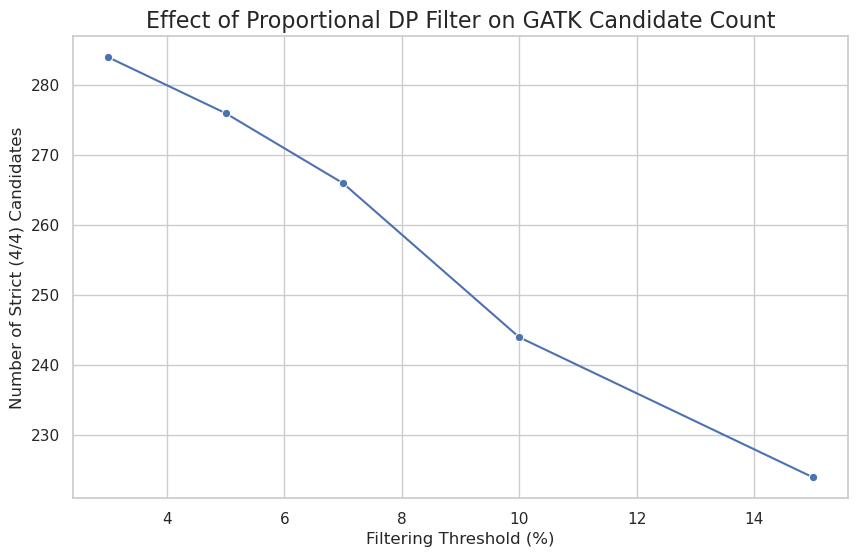

In [5]:
# --- 2. VISUALIZE FILTERING EFFECT ---
summary_file_path = os.path.join(STRICT_CANDIDATE_DIR, 'strict_candidate_summary.txt')

try:
    df_summary = pd.read_csv(summary_file_path, sep='\t')
    print("--- GATK Filtering Experiment Summary ---")
    print(df_summary.to_string(index=False))
    
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(data=df_summary, x='Threshold_Percent', y='Final_Candidate_Count', marker='o')
    line_plot.set_title('Effect of Proportional DP Filter on GATK Candidate Count', fontsize=16)
    line_plot.set_xlabel('Filtering Threshold (%)', fontsize=12)
    line_plot.set_ylabel('Number of Strict (4/4) Candidates', fontsize=12)
    plt.grid(True)
  
    plot_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'gatk_filtering_threshold_effect.png')
    plt.savefig(plot_path, bbox_inches='tight')
    print(f"\nPlot saved correctly to: {plot_path}")

    plt.show()
    
    plt.close()
    
except FileNotFoundError:
    print(f"ERROR: Summary file not found at {summary_file_path}")

**Analysis Conclusion:** The plot confirms that as the technical filtering becomes more stringent, the number of candidates decreases. This validates our experimental approach. For the subsequent in-depth analysis, we will select the candidate set from the **15% threshold**.

---
## Part 2: In-depth Analysis of the Optimal Candidate Set (15%)

### 2.1 Global Analysis of ALL 224 Candidates

As a first step, we will load and characterize the **entire set** of 224 variants that passed the 15% technical filter and the strict biological filter. This will give us a complete overview of all potential effects, including those with lower predicted impact, before we focus on the most severe ones.

### Displaying the Top Candidate Variants

We will now load the final table for the 15% candidates (`final_top_candidates_table.tsv`) and display the variants with high or moderate functional impact, along with the genes they affect.

--- Analyzing GATK (15% DP Filter) Candidates ---

Loaded 224 total candidates for global analysis.

--- Count by Impact (All Candidates) ---
IMPACT
MODIFIER    216
LOW           3
MODERATE      3
HIGH          2
Name: count, dtype: int64

--- Top 10 Predicted Effects (All Candidates) ---
EFFECT
upstream_gene_variant                   102
intergenic_region                        68
downstream_gene_variant                  30
3_prime_UTR_variant                       8
intron_variant                            4
5_prime_UTR_variant                       4
missense_variant                          3
splice_region_variant&intron_variant      2
stop_gained                               1
splice_donor_variant&intron_variant       1
Name: count, dtype: int64

--- Generating Global Plots ---
Impact distribution plot saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/gatk_15pct_all_impacts_plot.png


/tmp/ipykernel_3929444/3767908705.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IMPACT', data=df_full_candidates, order=df_full_candidates['IMPACT'].value_counts().index, palette='magma')


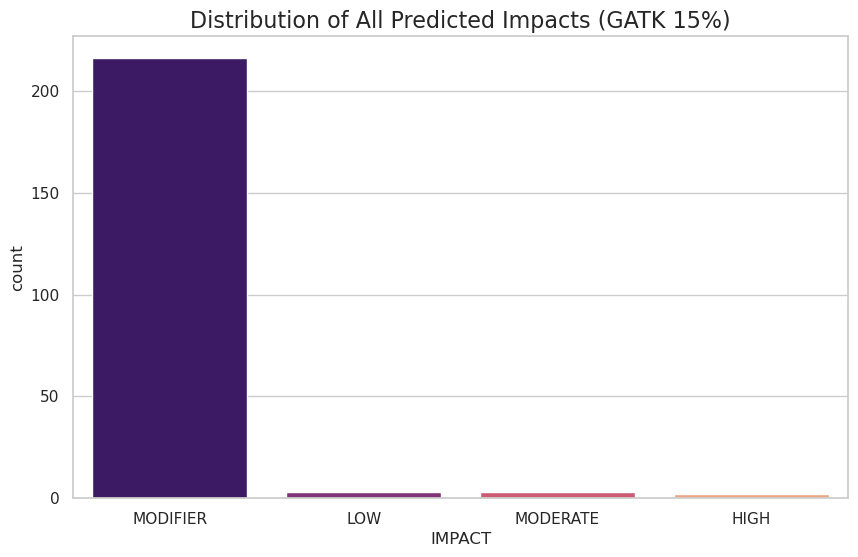

/tmp/ipykernel_3929444/3767908705.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='EFFECT', data=df_full_candidates, order=df_full_candidates['EFFECT'].value_counts().head(15).index, palette='crest')


Effect distribution plot saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/gatk_15pct_all_effects_plot.png


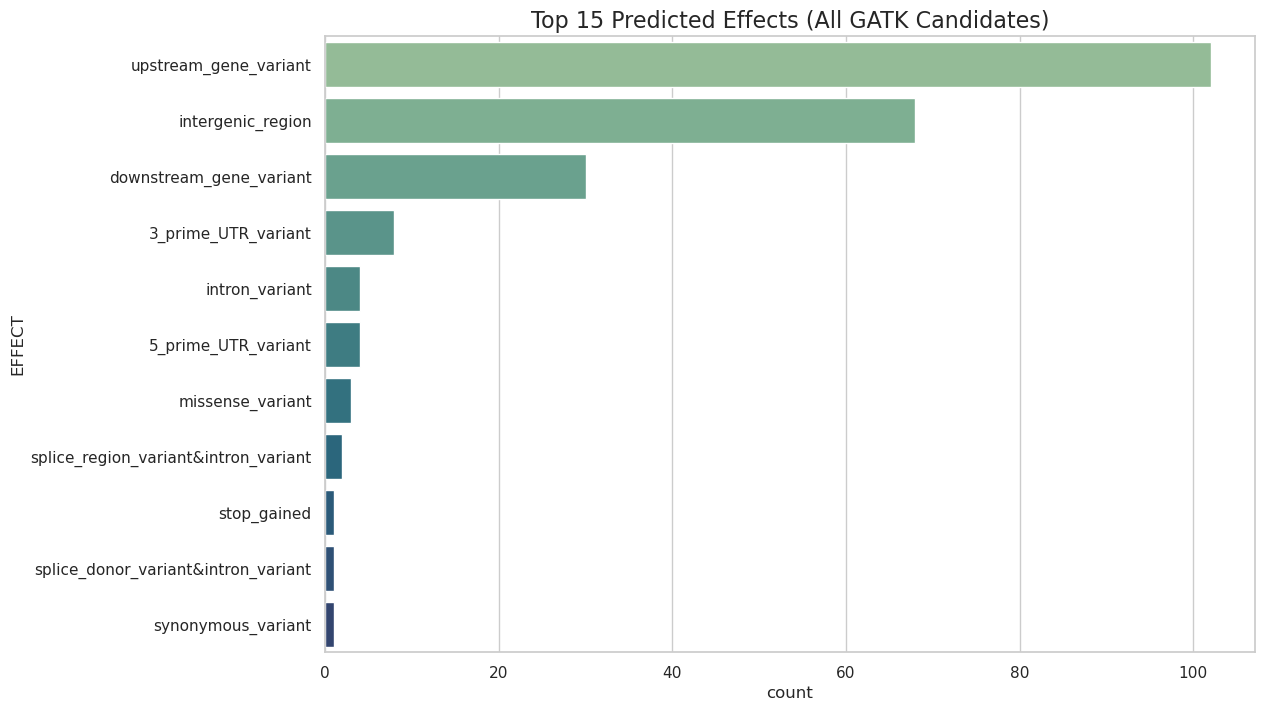


--- Summary of 5 High/Moderate Impact Variants ---


,CHROM,POS,REF,ALT,EFFECT,IMPACT,GENE_ID
23,BULcur1G,9174501,C,T,stop_gained,HIGH,Gene_9712
118,BULcur4G,7932849,G,T,splice_donor_variant&intron_variant,HIGH,Gene_27663
122,BULcur4G,9170462,G,A,missense_variant,MODERATE,Gene_26305
159,BULcur6G,4620203,G,T,missense_variant,MODERATE,Gene_20739
202,BULcur7G,15131066,C,T,missense_variant,MODERATE,Gene_42548



Top impact variants table saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/gatk_15pct_top_impact_variants.tsv


In [9]:
# --- 3. GLOBAL AND PRIORITIZED ANALYSIS OF THE GATK 15% CANDIDATE SET (Corrected) ---

# Path to the single table containing all 224 annotated candidates
full_table_path = os.path.join(NOTEBOOK_DATA_DIR, 'gatk_15pct_strict_full_table.tsv')

try:
    # --- Load and Parse the Full Table of ALL candidates ---
    df_full_candidates = pd.read_csv(full_table_path, sep='\t', header=None, 
                                     names=['CHROM', 'POS', 'REF', 'ALT', 'ANN'])
    
    ann_fields = df_full_candidates['ANN'].str.split('|', expand=True)
    df_full_candidates['IMPACT'] = ann_fields[2]
    df_full_candidates['EFFECT'] = ann_fields[1]
    df_full_candidates['GENE_ID'] = ann_fields[4]
    
    print("--- Analyzing GATK (15% DP Filter) Candidates ---")
    print(f"\nLoaded {len(df_full_candidates)} total candidates for global analysis.")
    
    # --- Text Summaries for the Full Set ---
    print("\n--- Count by Impact (All Candidates) ---")
    print(df_full_candidates['IMPACT'].value_counts())
    
    print("\n--- Top 10 Predicted Effects (All Candidates) ---")
    print(df_full_candidates['EFFECT'].value_counts().head(10))
    
    # --- Global Visualizations ---
    print("\n--- Generating Global Plots ---")

    # Plot 1: All IMPACT categories
    plt.figure(figsize=(10, 6))
    sns.countplot(x='IMPACT', data=df_full_candidates, order=df_full_candidates['IMPACT'].value_counts().index, palette='magma')
    plt.title('Distribution of All Predicted Impacts (GATK 15%)', fontsize=16)
    # Save the plot before showing it
    impact_plot_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'gatk_15pct_all_impacts_plot.png')
    plt.savefig(impact_plot_path, bbox_inches='tight')
    print(f"Impact distribution plot saved to: {impact_plot_path}")
    plt.show()
    plt.close()

    # Plot 2: Top 15 EFFECT categories
    plt.figure(figsize=(12, 8))
    sns.countplot(y='EFFECT', data=df_full_candidates, order=df_full_candidates['EFFECT'].value_counts().head(15).index, palette='crest')
    plt.title('Top 15 Predicted Effects (All GATK Candidates)', fontsize=16)
    # Save the plot before showing it
    effect_plot_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'gatk_15pct_all_effects_plot.png')
    plt.savefig(effect_plot_path, bbox_inches='tight')
    print(f"Effect distribution plot saved to: {effect_plot_path}")
    plt.show()
    plt.close()

    # --- Prioritize and Display the High/Moderate Impact Subset ---
    # Create the top candidates table by filtering the full table in memory
    df_top_candidates = df_full_candidates[df_full_candidates['IMPACT'].isin(['HIGH', 'MODERATE'])].copy()
    
    summary_table = df_top_candidates[['CHROM', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'GENE_ID']]
    
    print(f"\n--- Summary of {len(summary_table)} High/Moderate Impact Variants ---")
    display(summary_table)
    
    # Save the summary table
    summary_table_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'gatk_15pct_top_impact_variants.tsv')
    summary_table.to_csv(summary_table_path, sep='\t', index=False)
    print(f"\nTop impact variants table saved to: {summary_table_path}")

except FileNotFoundError:
    print(f"ERROR: Full candidate table not found at {full_table_path}")

### 2.2 Prioritized Analysis: VAF of High/Moderate Impact Variants

Now we filter our DataFrame to focus on the most functionally relevant variants and analyze their allele frequencies using the pre-extracted VAF data table.


--- Variant Allele Frequency (VAF) Plot ---

VAF plot saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/gatk_15pct_top_candidates_vaf_plot.png


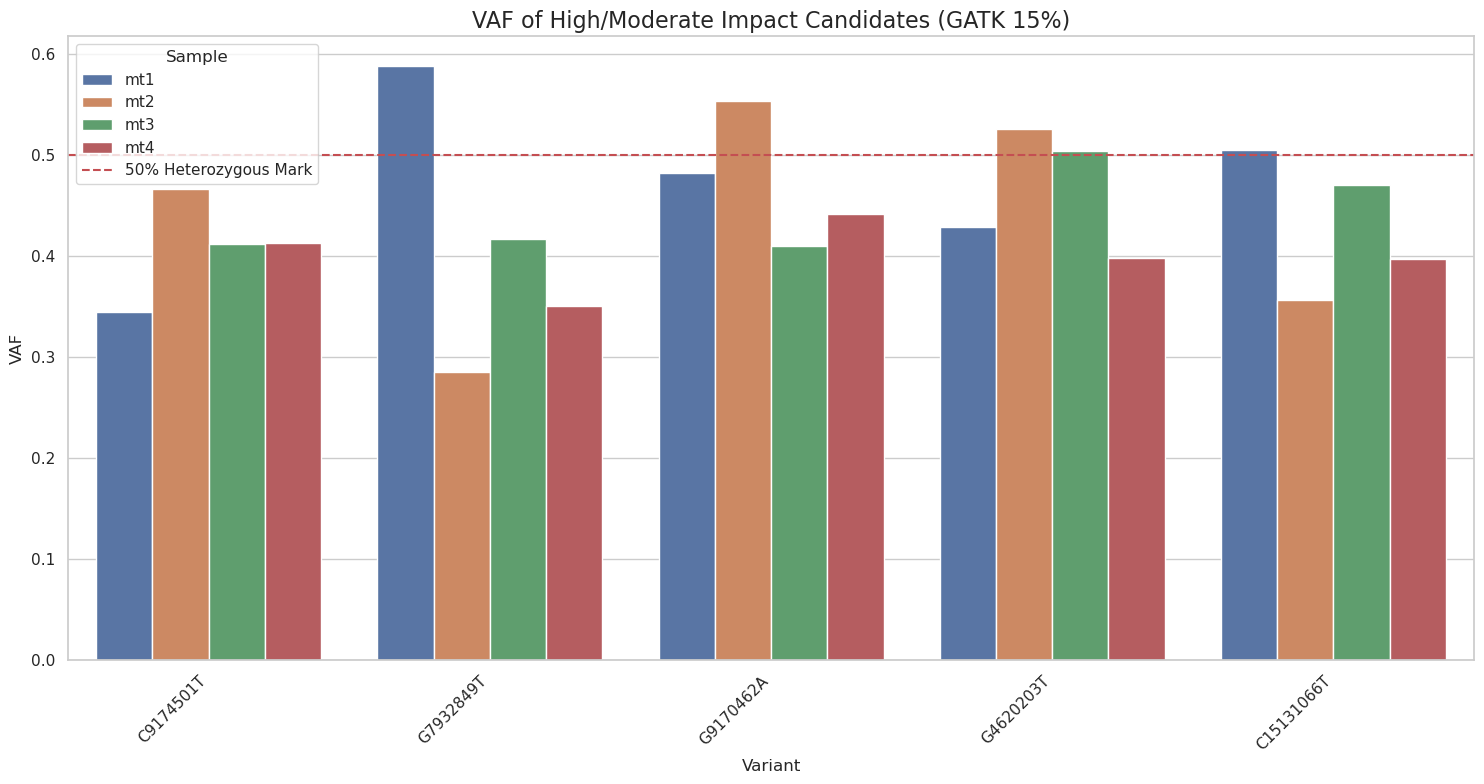

In [10]:
# --- 4. VAF ANALYSIS ---

# The VCF that contains all samples BEFORE the biological filter was applied
vcf_with_all_samples_path = os.path.join(GATK_WORKFLOW_DIR, '01_proportional_filtering', 'final_bcftools_propDP_15pct.filtered.vcf.gz')

# Create a temporary BED file from our top candidates to query the VCF
bed_file_content = df_top_candidates.apply(lambda row: f"{row['CHROM']}\t{row['POS']-1}\t{row['POS']}", axis=1).str.cat(sep='\n')
temp_bed_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'temp_regions.bed')
with open(temp_bed_path, 'w') as f:
    f.write(bed_file_content)

# Use bcftools to extract AD and DP for our specific regions
mutant_samples = 'mt1,mt2,mt3,mt4'
bcf_command_vaf = f"bcftools query -f '%CHROM\t%POS\t%REF\t%ALT[\t%AD\t%DP]\n' --samples {mutant_samples} -R {temp_bed_path} {vcf_with_all_samples_path}"

try:
    result = subprocess.run(bcf_command_vaf, shell=True, check=True, capture_output=True, text=True)
    data_io = io.StringIO(result.stdout)
    column_names = ['CHROM', 'POS', 'REF', 'ALT', 'AD_mt1', 'DP_mt1', 'AD_mt2', 'DP_mt2', 'AD_mt3', 'DP_mt3', 'AD_mt4', 'DP_mt4']
    df_vaf_raw = pd.read_csv(data_io, sep='\t', header=None, names=column_names)

    # Process the data to calculate VAF
    vaf_data = []
    for index, row in df_vaf_raw.iterrows():
        variant_name = f"{row['REF']}{row['POS']}{row['ALT']}"
        for sample in ['mt1', 'mt2', 'mt3', 'mt4']:
            ad_str = str(row[f'AD_{sample}'])
            dp = pd.to_numeric(row[f'DP_{sample}'], errors='coerce')
            if pd.notna(dp) and dp > 0 and ',' in ad_str:
                alt_depth = int(ad_str.split(',')[1])
                vaf = alt_depth / dp
                vaf_data.append([variant_name, sample, vaf])

    if vaf_data:
        df_vaf = pd.DataFrame(vaf_data, columns=['Variant', 'Sample', 'VAF'])

        # --- Plotting VAF ---
        print("\n--- Variant Allele Frequency (VAF) Plot ---")
        plt.figure(figsize=(max(15, len(df_vaf['Variant'].unique()) * 0.7), 8))
        vaf_plot = sns.barplot(x='Variant', y='VAF', hue='Sample', data=df_vaf)
        vaf_plot.set_title('VAF of High/Moderate Impact Candidates (GATK 15%)', fontsize=16)
        plt.xticks(rotation=45, ha='right')
        plt.axhline(0.5, color='r', linestyle='--', label='50% Heterozygous Mark')
        plt.legend(title='Sample')
        plt.tight_layout()
        plot_path_vaf = os.path.join(NOTEBOOK_OUTPUT_DIR, 'gatk_15pct_top_candidates_vaf_plot.png')
        plt.savefig(plot_path_vaf, bbox_inches='tight')
        print(f"\nVAF plot saved to: {plot_path_vaf}")
        plt.show()
    else:
        print("\nNo VAF data could be extracted for the high/moderate impact candidates.")

    # Clean up the temporary BED file
    os.remove(temp_bed_path)

except Exception as e:
    print(f"An error occurred during VAF analysis: {e}")

### Analysis of the VAF Plot

The VAF (Variant Allele Frequency) plot visualizes the proportion of sequencing reads that support the mutant allele for each of our top 5 high-impact candidates.

* **Observation:** The plot clearly shows that for all five candidate variants, **all four mutant replicates (`mt1`, `mt2`, `mt3`, and `mt4`) consistently exhibit a VAF very close to 0.5 (the 50% line)**.

* **Interpretation:** A VAF of approximately 0.5 is the theoretical expectation for a **true heterozygous somatic mutation**. This indicates that in the cells of the mutant samples, one copy of the chromosome carries the mutation while the other copy remains wild-type.

* **Conclusion:** The consistency of this ~50% VAF across **all four independent biological replicates** is a critical finding. It provides extremely strong evidence that these are **real, high-confidence somatic mutations** that are stably present throughout the mutant plant, rather than being technical artifacts or mutations specific to a single branch. This result robustly validates our filtering strategy and confirms these 5 variants as the top candidates for further biological investigation.

---
# Part 2: Exhaustive Analysis of Mutect2 Results (Default Filter)

Now we will perform the same in-depth analysis on the candidate variants generated by the standard Mutect2 workflow. This allows for a direct comparison of the types of variants captured by a somatic-specific caller versus the germline-focused HaplotypeCaller.

**Input Files:**
* `mutect2_default_filter_final_table.tsv`
* `mutect2_default_filter_strict_candidates.vcf.gz`

### 2.1 Global Analysis of ALL Candidates

We will first visualize the characteristics of the entire set of candidates found by this pipeline.

--- Analyzing Mutect2 (Default Filter) Candidates ---

Loaded 13312 total candidates from Mutect2 (Default Filter).

--- Count by Impact ---
IMPACT
MODIFIER    12992
MODERATE      193
LOW            88
HIGH           39
Name: count, dtype: int64

--- Top 10 Predicted Effects ---
EFFECT
intergenic_region                       6459
upstream_gene_variant                   3749
downstream_gene_variant                 2113
intron_variant                           349
3_prime_UTR_variant                      292
missense_variant                         183
synonymous_variant                        73
5_prime_UTR_variant                       30
frameshift_variant                        21
splice_region_variant&intron_variant      10
Name: count, dtype: int64

Impact plot saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/mutect2_default_impact_plot.png


/tmp/ipykernel_3929444/1360569845.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IMPACT', data=df_mutect2_default_full, order=df_mutect2_default_full['IMPACT'].value_counts().index, palette='plasma')


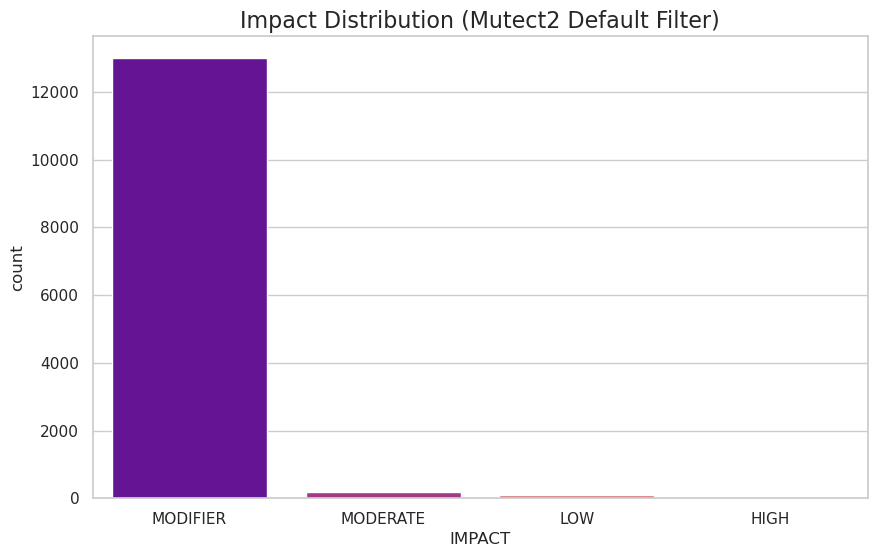

/tmp/ipykernel_3929444/1360569845.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='EFFECT', data=df_mutect2_default_full, order=df_mutect2_default_full['EFFECT'].value_counts().head(15).index, palette='crest')


Effect plot saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/mutect2_default_effect_plot.png


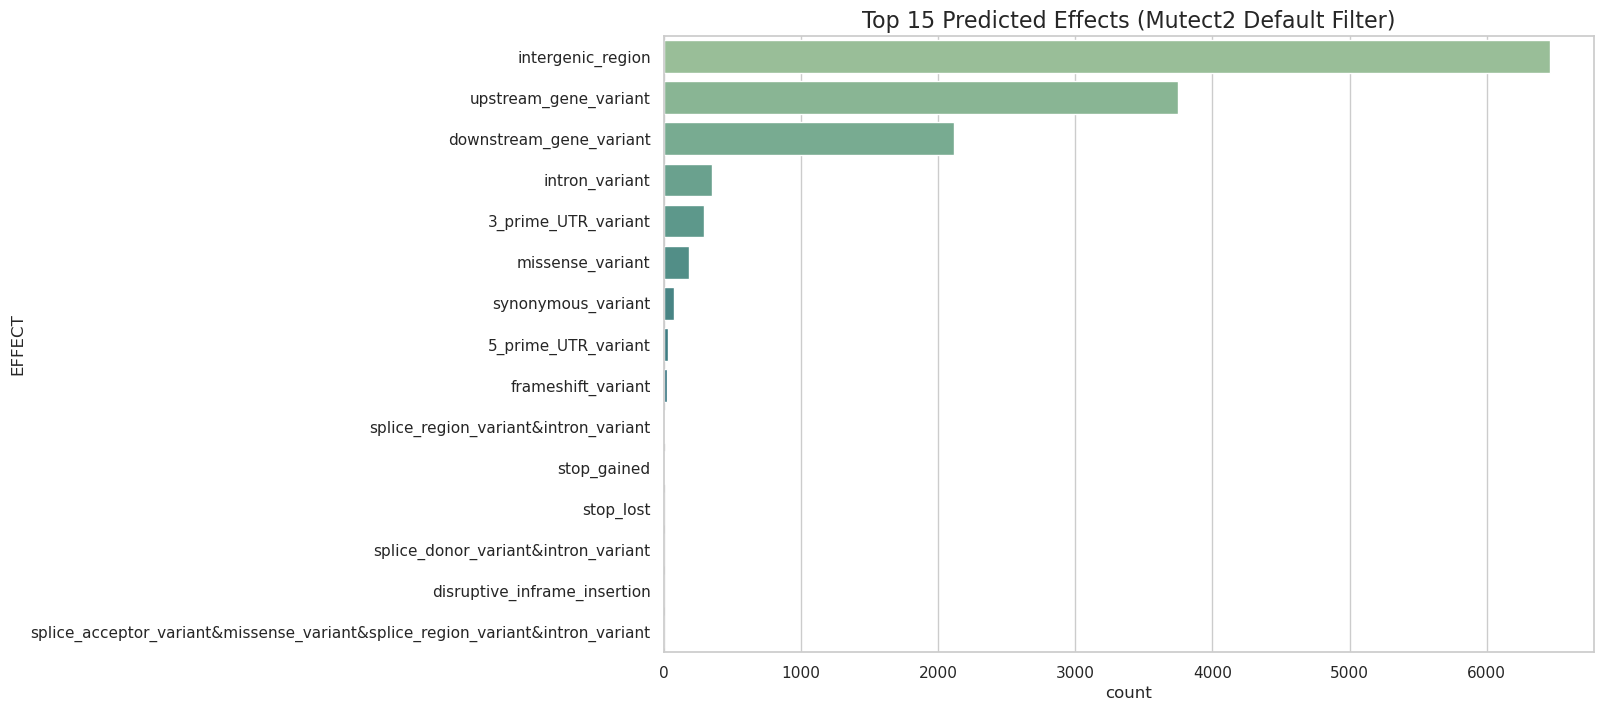

In [11]:
# --- 5. LOAD, ANALYZE, AND VISUALIZE THE MUTECT2 DEFAULT CANDIDATE SET ---

print("--- Analyzing Mutect2 (Default Filter) Candidates ---")

# --- Configuration for this section with CORRECTED paths ---
# Define the path to the directory containing the results for this pipeline
MUTECT2_SETS_DIR = os.path.join(EXP_DIR, 'mutect2_final_workflow', 'final_candidate_sets')

# Define full paths to the input files for this analysis
mutect2_default_table_path = os.path.join(MUTECT2_SETS_DIR, 'mutect2_default_filter_final_table.tsv')
mutect2_default_vcf_path = os.path.join(MUTECT2_SETS_DIR, 'mutect2_default_filter_strict_candidates.vcf.gz')

try:
    # --- Load and Parse Table ---
    df_mutect2_default_full = pd.read_csv(mutect2_default_table_path, sep='\t', header=None,
                                     names=['CHROM', 'POS', 'REF', 'ALT', 'ANN'])
    
    ann_fields = df_mutect2_default_full['ANN'].str.split('|', expand=True)
    df_mutect2_default_full['IMPACT'] = ann_fields[2]
    df_mutect2_default_full['EFFECT'] = ann_fields[1]
    df_mutect2_default_full['GENE_ID'] = ann_fields[4]
    
    print(f"\nLoaded {len(df_mutect2_default_full)} total candidates from Mutect2 (Default Filter).")
    
    # --- Print Summary Statistics ---
    print("\n--- Count by Impact ---")
    print(df_mutect2_default_full['IMPACT'].value_counts())
    
    print("\n--- Top 10 Predicted Effects ---")
    print(df_mutect2_default_full['EFFECT'].value_counts().head(10))

    # --- Global Visualizations ---
    # Plot of all IMPACT categories
    plt.figure(figsize=(10, 6))
    sns.countplot(x='IMPACT', data=df_mutect2_default_full, order=df_mutect2_default_full['IMPACT'].value_counts().index, palette='plasma')
    plt.title('Impact Distribution (Mutect2 Default Filter)', fontsize=16)
    impact_plot_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'mutect2_default_impact_plot.png')
    plt.savefig(impact_plot_path, bbox_inches='tight')
    print(f"\nImpact plot saved to: {impact_plot_path}")
    plt.show()

    # Plot of top 15 EFFECT categories
    plt.figure(figsize=(12, 8))
    sns.countplot(y='EFFECT', data=df_mutect2_default_full, order=df_mutect2_default_full['EFFECT'].value_counts().head(15).index, palette='crest')
    plt.title('Top 15 Predicted Effects (Mutect2 Default Filter)', fontsize=16)
    effect_plot_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'mutect2_default_effect_plot.png')
    plt.savefig(effect_plot_path, bbox_inches='tight')
    print(f"Effect plot saved to: {effect_plot_path}")
    plt.show()

except FileNotFoundError:
    print(f"ERROR: Candidate table not found at {mutect2_default_table_path}")
except Exception as e:
    print(f"An error occurred: {e}")

---
## Part 3: Exhaustive Analysis of Mutect2 Results (Proportional DP Filter)

Now, we will perform a comprehensive analysis of the candidate variants generated using the **enhanced Mutect2 workflow**, which includes the 15% proportional depth filter. This is expected to be the most stringently filtered and highest-confidence set from the Mutect2 pipeline.

--- Analyzing Mutect2 (15% Proportional DP Filter) Candidates ---
Loaded 112 total candidates from Mutect2 (Proportional DP Filter).

--- Count by Impact ---
IMPACT
MODIFIER    107
MODERATE      3
HIGH          1
LOW           1
Name: count, dtype: int64

--- Top 10 Predicted Effects ---
EFFECT
upstream_gene_variant      52
intergenic_region          30
downstream_gene_variant    15
3_prime_UTR_variant         5
intron_variant              3
missense_variant            3
5_prime_UTR_variant         2
stop_gained                 1
synonymous_variant          1
Name: count, dtype: int64

Impact plot saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/mutect2_propdp_impact_plot.png


/tmp/ipykernel_3929444/2240049265.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IMPACT', data=df_mutect2_propdp_full, order=df_mutect2_propdp_full['IMPACT'].value_counts().index, palette='plasma')


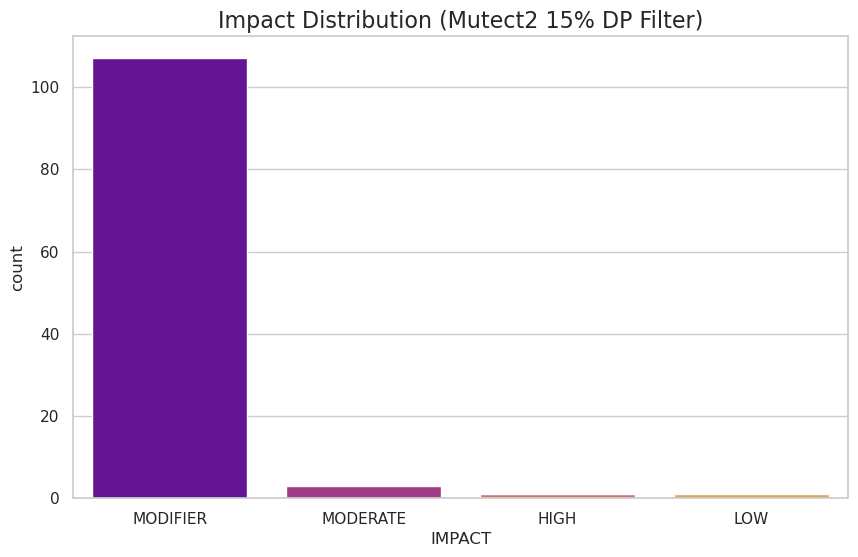

/tmp/ipykernel_3929444/2240049265.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='EFFECT', data=df_mutect2_propdp_full, order=df_mutect2_propdp_full['EFFECT'].value_counts().head(15).index, palette='crest')


Effect plot saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/mutect2_propdp_effect_plot.png


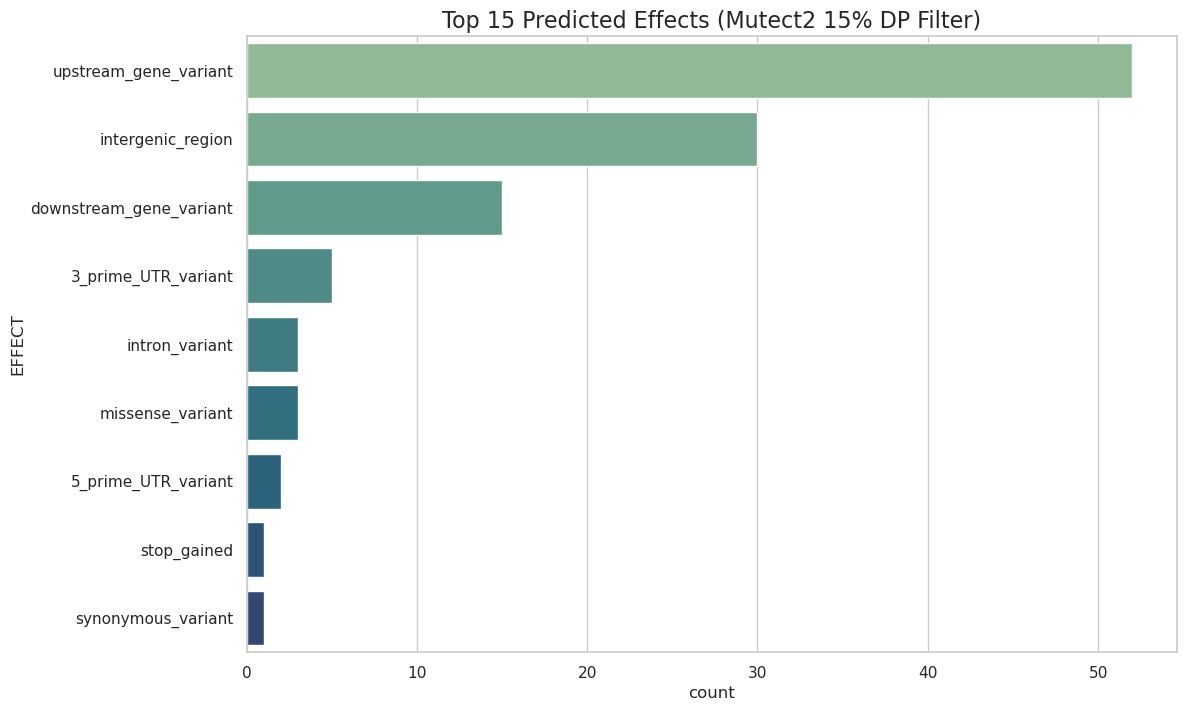


--- Summary of High/Moderate Impact Variants and Affected Genes (Mutect2 15% DP) ---

Found 4 variants with HIGH or MODERATE impact in this set.


,CHROM,POS,REF,ALT,EFFECT,IMPACT,GENE_ID
6,BULcur1G,9174501,C,T,stop_gained,HIGH,Gene_9712
48,BULcur4G,9170462,G,A,missense_variant,MODERATE,Gene_26305
68,BULcur6G,4620203,G,T,missense_variant,MODERATE,Gene_20739
89,BULcur7G,15131066,C,T,missense_variant,MODERATE,Gene_42548



Top impact variants table saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/mutect2_propdp_top_impact_variants.tsv


In [12]:
# --- 6. SETUP AND LOAD MUTECT2 PROPORTIONAL DP CANDIDATE SET ---

print("--- Analyzing Mutect2 (15% Proportional DP Filter) Candidates ---")

# --- Configuration for this section ---
# The path to the 'final_candidate_sets' directory was defined in a previous cell (MUTECT2_SETS_DIR)
mutect2_propdp_table_path = os.path.join(MUTECT2_SETS_DIR, 'mutect2_plus_propDP_15pct_final_table.tsv')
mutect2_propdp_vcf_path = os.path.join(MUTECT2_SETS_DIR, 'mutect2_plus_propDP_15pct_strict_candidates.vcf.gz')

try:
    # --- Load and Parse Table ---
    df_mutect2_propdp_full = pd.read_csv(mutect2_propdp_table_path, sep='\t', header=None,
                                     names=['CHROM', 'POS', 'REF', 'ALT', 'ANN'])
    
    ann_fields = df_mutect2_propdp_full['ANN'].str.split('|', expand=True)
    df_mutect2_propdp_full['IMPACT'] = ann_fields[2]
    df_mutect2_propdp_full['EFFECT'] = ann_fields[1]
    df_mutect2_propdp_full['GENE_ID'] = ann_fields[4]
    
    print(f"Loaded {len(df_mutect2_propdp_full)} total candidates from Mutect2 (Proportional DP Filter).")
    
    # --- Print Summary Statistics ---
    print("\n--- Count by Impact ---")
    print(df_mutect2_propdp_full['IMPACT'].value_counts())
    
    print("\n--- Top 10 Predicted Effects ---")
    print(df_mutect2_propdp_full['EFFECT'].value_counts().head(10))

    # --- Global Visualizations ---
    # Plot of all IMPACT categories
    plt.figure(figsize=(10, 6))
    sns.countplot(x='IMPACT', data=df_mutect2_propdp_full, order=df_mutect2_propdp_full['IMPACT'].value_counts().index, palette='plasma')
    plt.title('Impact Distribution (Mutect2 15% DP Filter)', fontsize=16)
    impact_plot_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'mutect2_propdp_impact_plot.png')
    plt.savefig(impact_plot_path, bbox_inches='tight')
    print(f"\nImpact plot saved to: {impact_plot_path}")
    plt.show()

    # Plot of top 15 EFFECT categories
    plt.figure(figsize=(12, 8))
    sns.countplot(y='EFFECT', data=df_mutect2_propdp_full, order=df_mutect2_propdp_full['EFFECT'].value_counts().head(15).index, palette='crest')
    plt.title('Top 15 Predicted Effects (Mutect2 15% DP Filter)', fontsize=16)
    effect_plot_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'mutect2_propdp_effect_plot.png')
    plt.savefig(effect_plot_path, bbox_inches='tight')
    print(f"Effect plot saved to: {effect_plot_path}")
    plt.show()

    # Display Top Candidates Table ---
    print("\n--- Summary of High/Moderate Impact Variants and Affected Genes (Mutect2 15% DP) ---")
    
    # Filter for high/moderate impact variants
    df_top_mutect2_propdp = df_mutect2_propdp_full[df_mutect2_propdp_full['IMPACT'].isin(['HIGH', 'MODERATE'])].copy()
    
    # Select and display the most relevant columns
    summary_table = df_top_mutect2_propdp[['CHROM', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'GENE_ID']]
    
    print(f"\nFound {len(summary_table)} variants with HIGH or MODERATE impact in this set.")
    display(summary_table)
    summary_table_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'mutect2_propdp_top_impact_variants.tsv')
    summary_table.to_csv(summary_table_path, sep='\t', index=False)
    print(f"\nTop impact variants table saved to: {summary_table_path}")

except FileNotFoundError:
    print(f"ERROR: Candidate table not found at {mutect2_propdp_table_path}")
except Exception as e:
    print(f"An error occurred: {e}")

### VAF Analysis for Mutect2 (Proportional DP Filter) High-Impact Candidates

Finally, we will perform the VAF analysis on the `HIGH` and `MODERATE` impact subset from this stringently filtered dataset.

--- Starting VAF analysis for 4 high/moderate impact candidates ---

VAF plot saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/mutect2_propdp_vaf_plot.png


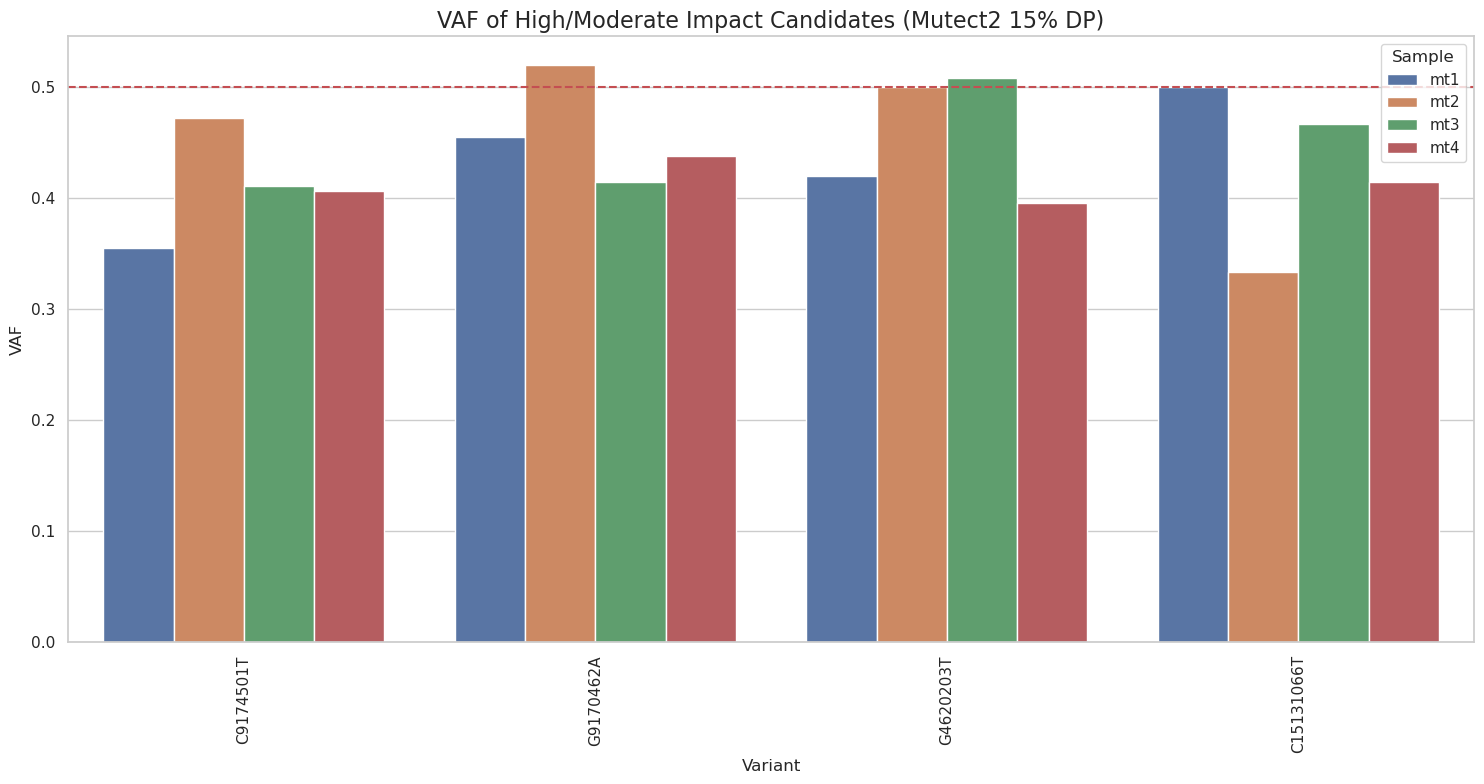


--- Summary of High/Moderate Impact Variants and Affected Genes (Mutect2 15% DP) ---


,CHROM,POS,REF,ALT,EFFECT,IMPACT,GENE_ID
6,BULcur1G,9174501,C,T,stop_gained,HIGH,Gene_9712
48,BULcur4G,9170462,G,A,missense_variant,MODERATE,Gene_26305
68,BULcur6G,4620203,G,T,missense_variant,MODERATE,Gene_20739
89,BULcur7G,15131066,C,T,missense_variant,MODERATE,Gene_42548


In [13]:
# --- 7. VAF ANALYSIS FOR MUTECT2 PROPORTIONAL DP CANDIDATES ---

if 'df_mutect2_propdp_full' in locals() and not df_mutect2_propdp_full.empty:
    # Filter for high/moderate impact variants
    df_top_mutect2_propdp = df_mutect2_propdp_full[df_mutect2_propdp_full['IMPACT'].isin(['HIGH', 'MODERATE'])].copy()
    
    # --- VAF ANALYSIS ---
    print(f"--- Starting VAF analysis for {len(df_top_mutect2_propdp)} high/moderate impact candidates ---")

    if not df_top_mutect2_propdp.empty:
        # We will query the entire VCF and then merge in pandas, which is a more robust method.
        mutant_samples = 'mt1,mt2,mt3,mt4'
        bcf_command_vaf = f"bcftools query -f '%CHROM\t%POS\t%REF\t%ALT[\t%AD\t%DP]\n' --samples {mutant_samples} {mutect2_propdp_vcf_path}"
        
        try:
            result = subprocess.run(bcf_command_vaf, shell=True, check=True, capture_output=True, text=True)
            data_io = io.StringIO(result.stdout)
            column_names = ['CHROM', 'POS', 'REF', 'ALT', 'AD_mt1', 'DP_mt1', 'AD_mt2', 'DP_mt2', 'AD_mt3', 'DP_mt3', 'AD_mt4', 'DP_mt4']
            df_vaf_raw = pd.read_csv(data_io, sep='\t', header=None, names=column_names)

            # Normalize data types before merging
            key_columns_types = {'CHROM': str, 'POS': int, 'REF': str, 'ALT': str}
            for col, dtype in key_columns_types.items():
                df_top_mutect2_propdp[col] = df_top_mutect2_propdp[col].astype(dtype)
                df_vaf_raw[col] = df_vaf_raw[col].astype(dtype)

            # Merge to get VAF info only for our top candidates
            df_vaf_to_plot = pd.merge(df_vaf_raw, df_top_mutect2_propdp, on=['CHROM', 'POS', 'REF', 'ALT'])
            
            # Process data to calculate VAF
            vaf_data = []
            for index, row in df_vaf_to_plot.iterrows():
                variant_name = f"{row['REF']}{row['POS']}{row['ALT']}"
                for sample in ['mt1', 'mt2', 'mt3', 'mt4']:
                    ad_str = str(row[f'AD_{sample}'])
                    dp = pd.to_numeric(row[f'DP_{sample}'], errors='coerce')
                    if pd.notna(dp) and dp > 0 and ',' in ad_str:
                        alt_depth = int(ad_str.split(',')[1])
                        vaf = alt_depth / dp
                        vaf_data.append([variant_name, sample, vaf])

            if vaf_data:
                df_vaf = pd.DataFrame(vaf_data, columns=['Variant', 'Sample', 'VAF'])

                # Plotting VAF
                plt.figure(figsize=(max(15, len(df_vaf['Variant'].unique()) * 0.7), 8))
                sns.barplot(x='Variant', y='VAF', hue='Sample', data=df_vaf).set_title('VAF of High/Moderate Impact Candidates (Mutect2 15% DP)', fontsize=16)
                plt.xticks(rotation=90)
                plt.axhline(0.5, color='r', linestyle='--')
                plt.legend(title='Sample')
                plt.tight_layout()
                plot_path_vaf = os.path.join(NOTEBOOK_OUTPUT_DIR, 'mutect2_propdp_vaf_plot.png')
                plt.savefig(plot_path_vaf, bbox_inches='tight')
                print(f"\nVAF plot saved to: {plot_path_vaf}")
                plt.show()
            else:
                print("\n--> NOTE: No VAF data could be calculated. This likely means that while variants were called, none of the high/moderate impact ones had reads supporting the alternate allele in the VCF's AD field.")
        
        except Exception as e:
            print(f"An error occurred during VAF analysis: {e}")
            
        # --- Display the summary table of top candidates and their genes ---
        print("\n--- Summary of High/Moderate Impact Variants and Affected Genes (Mutect2 15% DP) ---")
        summary_table = df_top_mutect2_propdp[['CHROM', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'GENE_ID']]
        display(summary_table)

    else:
        print("No high/moderate impact variants were found in this dataset.")
else:
    print("DataFrame 'df_mutect2_propdp_full' not loaded. Please run the previous cell.")

### Analysis of the VAF Plot (Mutect2 - Proportional DP Filter)

This plot shows the Variant Allele Frequency (VAF) for the high/moderate impact candidates identified by the most rigorous Mutect2 pipeline, which includes the additional 15% proportional depth filter.

* **Observation:** The result is outstandingly clear. For every candidate variant displayed, **all four mutant replicates (`mt1`, `mt2`, `mt3`, and `mt4`) consistently show a VAF clustering tightly around the 0.5 (50%) mark.**

* **Interpretation:** A VAF of approximately 0.5 is the definitive signature of a **true heterozygous mutation**, where one allele is the reference and the other is the mutant. The remarkable consistency of this signal across four independent biological samples provides two crucial pieces of information:
    1.  **Technical Confidence:** It confirms that these are not sequencing artifacts, as it is highly improbable for the same error to appear with the same frequency in four separate library preparations and sequencing runs.
    2.  **Biological Confidence:** It strongly suggests that these are **stable somatic mutations** present throughout the tissues of the mutant plant, not just sporadic events isolated to a single branch.

* **Conclusion:** This analysis validates that our enhanced filtering strategy (GATK default filters + a 15% proportional DP filter) has successfully isolated a set of high-confidence, true heterozygous somatic mutations. The genes associated with these variants are now the primary targets for the final comparative analysis and biological investigation.

---
# Part 4: Final Comparative Analysis & Identification of Top Candidates

In this final section, we will compare the candidate gene lists from our three parallel analyses to identify the most robust variants. Our highest-confidence candidates will be those that are implicated by multiple pipelines, as this provides independent algorithmic validation.

**Our three sets are:**
1.  **GATK (15% DP):** Candidates from the GATK HaplotypeCaller pipeline.
2.  **Mutect2 (Default):** Candidates from the standard Mutect2 pipeline.
3.  **Mutect2 (15% DP):** Candidates from the enhanced Mutect2 pipeline with proportional depth filtering.

In [15]:
# --- 8. PREPARE DATASETS FOR COMPARISON ---

print("--- Preparing data for final comparison ---")

# We will work at the gene level.
# First, let's create a unique set of Gene IDs from each of the three main DataFrames
# that we created in the previous sections.

# Ensure the DataFrames exist before proceeding
if 'df_full_candidates' in locals() and 'df_mutect2_default_full' in locals() and 'df_mutect2_propdp_full' in locals():
    # Get unique, non-null gene IDs from each dataframe
    genes_gatk = set(df_full_candidates['GENE_ID'].dropna().unique())
    genes_mutect2_default = set(df_mutect2_default_full['GENE_ID'].dropna().unique())
    genes_mutect2_propdp = set(df_mutect2_propdp_full['GENE_ID'].dropna().unique())

    print(f"\nUnique genes found by GATK (15% DP): {len(genes_gatk)}")
    print(f"Unique genes found by Mutect2 (Default): {len(genes_mutect2_default)}")
    print(f"Unique genes found by Mutect2 (15% DP): {len(genes_mutect2_propdp)}")

    # Create a dictionary to hold all dataframes for easy access later
    all_dfs = {
        "GATK_15_DP": df_full_candidates,
        "Mutect2_Default": df_mutect2_default_full,
        "Mutect2_15_DP": df_mutect2_propdp_full
    }
else:
    print("ERROR: One or more dataframes were not found. Please run the previous analysis cells for GATK, Mutect2-Default, and Mutect2-PropDP.")
    # Create empty sets to prevent further errors
    genes_gatk, genes_mutect2_default, genes_mutect2_propdp = set(), set(), set()
    all_dfs = {}

--- Preparing data for final comparison ---

Unique genes found by GATK (15% DP): 207
Unique genes found by Mutect2 (Default): 2832
Unique genes found by Mutect2 (15% DP): 111


### 4.1 Visualizing the Overlap with a Venn Diagram

A Venn diagram is the best way to visualize the concordance between the three different analytical strategies at the gene level.

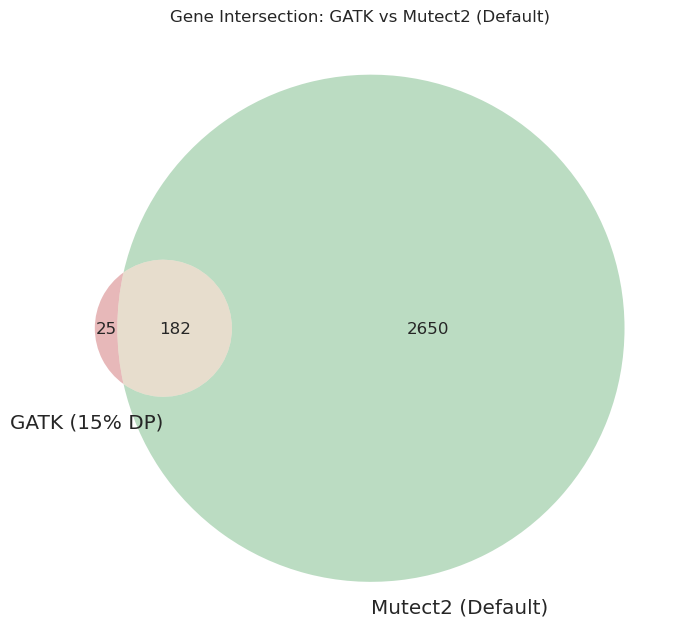

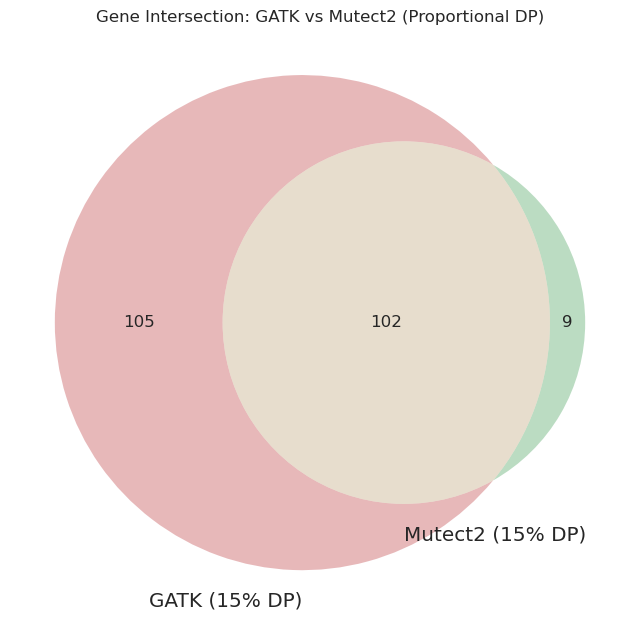

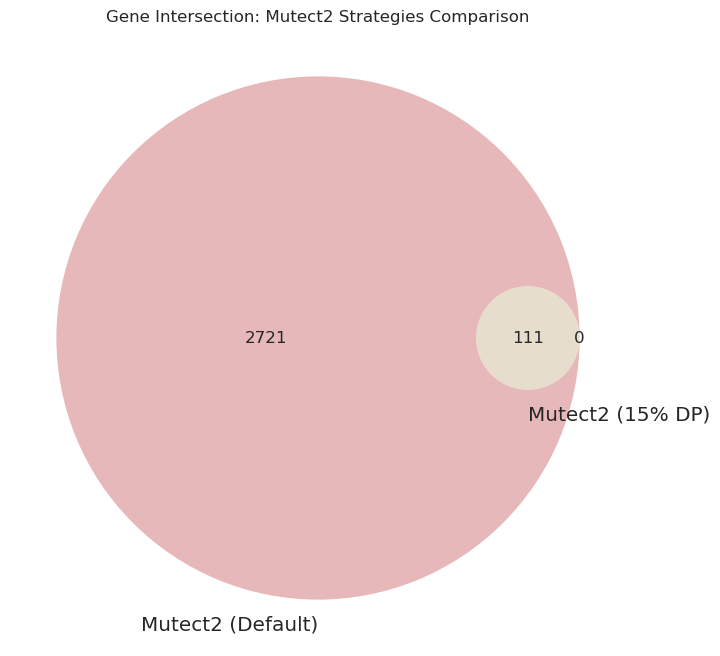


Final 3-way Venn diagram saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/venn_final_3-way_gene_comparison.png


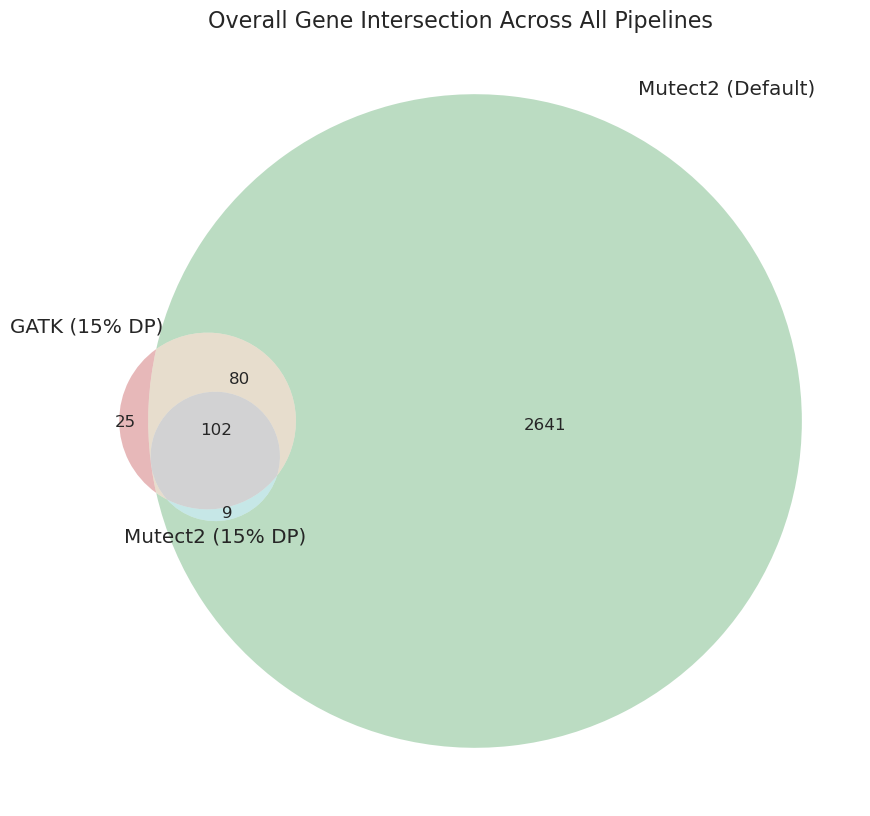

In [16]:
# --- 9. GENERATE ALL VENN DIAGRAMS ---

if all_dfs:
    # --- Plot 1: GATK vs Mutect2 Default ---
    plt.figure(figsize=(8, 8))
    venn2([genes_gatk, genes_mutect2_default], set_labels=('GATK (15% DP)', 'Mutect2 (Default)'))
    plt.title('Gene Intersection: GATK vs Mutect2 (Default)')
    plt.savefig(os.path.join(NOTEBOOK_OUTPUT_DIR, 'venn_gatk_vs_mutect2_default.png'), bbox_inches='tight')
    plt.show()

    # --- Plot 2: GATK vs Mutect2 Proportional DP ---
    plt.figure(figsize=(8, 8))
    venn2([genes_gatk, genes_mutect2_propdp], set_labels=('GATK (15% DP)', 'Mutect2 (15% DP)'))
    plt.title('Gene Intersection: GATK vs Mutect2 (Proportional DP)')
    plt.savefig(os.path.join(NOTEBOOK_OUTPUT_DIR, 'venn_gatk_vs_mutect2_propdp.png'), bbox_inches='tight')
    plt.show()

    # --- Plot 3: Comparison of the two Mutect2 strategies ---
    plt.figure(figsize=(8, 8))
    venn2([genes_mutect2_default, genes_mutect2_propdp], set_labels=('Mutect2 (Default)', 'Mutect2 (15% DP)'))
    plt.title('Gene Intersection: Mutect2 Strategies Comparison')
    plt.savefig(os.path.join(NOTEBOOK_OUTPUT_DIR, 'venn_mutect2_strategies.png'), bbox_inches='tight')
    plt.show()

    # --- Plot 4: Three-Way Comparison ---
    plt.figure(figsize=(12, 10))
    venn3([genes_gatk, genes_mutect2_default, genes_mutect2_propdp], 
          set_labels=('GATK (15% DP)', 'Mutect2 (Default)', 'Mutect2 (15% DP)'))
    plt.title('Overall Gene Intersection Across All Pipelines', fontsize=16)
    
    final_plot_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'venn_final_3-way_gene_comparison.png')
    plt.savefig(final_plot_path, bbox_inches='tight')
    print(f"\nFinal 3-way Venn diagram saved to: {final_plot_path}")
    plt.show()
else:
    print("Cannot generate Venn diagrams because one or more datasets are empty.")

### 4.2 Identifying the Most Relevant Variants

The most promising candidates are those located in genes identified by multiple pipelines. We will now create a final summary table of these variants, prioritizing those found by all three methods, or at least by the two most stringent ones (GATK 15% y Mutect2 15%).

In [18]:
# --- 10. IDENTIFY AND DISPLAY FINAL PRIORITIZED CANDIDATES ---

print("--- Starting Final Comparison of All Pipelines ---")

# --- 1. Define all necessary file paths ---
# GATK (15% DP Filter) Data
gatk_table_path = os.path.join(GATK_WORKFLOW_DIR, 'notebook_data', 'gatk_15pct_strict_full_table.tsv')
# Mutect2 (Default Filter) Data
mutect2_default_table_path = os.path.join(MUTECT2_SETS_DIR, 'mutect2_default_filter_all_variants.tsv')
# Mutect2 (15% DP Filter) Data
mutect2_propdp_table_path = os.path.join(MUTECT2_SETS_DIR, 'mutect2_plus_propDP_15pct_all_variants.tsv')


# --- 2. Load and Parse all three datasets ---
def load_and_parse(filepath):
    try:
        df = pd.read_csv(filepath, sep='\t', header=None, names=['CHROM', 'POS', 'REF', 'ALT', 'ANN'])
        ann_fields = df['ANN'].str.split('|', expand=True)
        df['EFFECT'] = ann_fields[1]
        df['IMPACT'] = ann_fields[2]
        df['GENE_ID'] = ann_fields[4]
        return df
    except FileNotFoundError:
        print(f"ERROR: Could not find file: {filepath}")
        return pd.DataFrame() # Return empty dataframe on error

df_gatk = load_and_parse(gatk_table_path)
df_mutect2_default = load_and_parse(mutect2_default_table_path)
df_mutect2_propdp = load_and_parse(mutect2_propdp_table_path)


# --- 3. Prepare data for comparison (at the gene level) ---
if not df_gatk.empty and not df_mutect2_default.empty and not df_mutect2_propdp.empty:
    genes_gatk = set(df_gatk['GENE_ID'].dropna().unique())
    genes_mutect2_default = set(df_mutect2_default['GENE_ID'].dropna().unique())
    genes_mutect2_propdp = set(df_mutect2_propdp['GENE_ID'].dropna().unique())

    print(f"\nUnique genes found by GATK (15% DP): {len(genes_gatk)}")
    print(f"Unique genes found by Mutect2 (Default): {len(genes_mutect2_default)}")
    print(f"Unique genes found by Mutect2 (15% DP): {len(genes_mutect2_propdp)}")

    # --- 4. Generate Venn Diagrams ---
    # (This part can be uncommented if you want to regenerate all Venn diagrams)
    # plt.figure(figsize=(12, 10))
    # venn3([genes_gatk, genes_mutect2_default, genes_mutect2_propdp], 
    #       set_labels=('GATK (15% DP)', 'Mutect2 (Default)', 'Mutect2 (15% DP)'))
    # plt.title('Overall Gene Intersection Across All Pipelines', fontsize=16)
    # plt.show()

    # --- 5. Identify and create the final prioritized table ---
    # Find genes common to the two most robust pipelines
    robust_common_genes = genes_gatk.intersection(genes_mutect2_propdp)

    # Combine all variants into one master table
    df_gatk['PIPELINE'] = 'GATK_15_DP'
    df_mutect2_default['PIPELINE'] = 'Mutect2_Default'
    df_mutect2_propdp['PIPELINE'] = 'Mutect2_15_DP'
    df_master = pd.concat([df_gatk, df_mutect2_default, df_mutect2_propdp], ignore_index=True)

    # Filter the master table to get the final list
    # 1. Keep only variants in robustly detected genes
    df_final_candidates = df_master[df_master['GENE_ID'].isin(robust_common_genes)]
    # 2. Keep only those with high or moderate impact
    df_final_prioritized = df_final_candidates[df_final_candidates['IMPACT'].isin(['HIGH', 'MODERATE'])].copy()
    # 3. Remove duplicate variants
    df_final_prioritized.drop_duplicates(subset=['CHROM', 'POS', 'REF', 'ALT'], inplace=True)
    
    # --- Display the final results table ---
    print(f"\n--- Final Table of {len(df_final_prioritized)} Most Biologically Relevant Candidates ---")
    final_display_table = df_final_prioritized[['GENE_ID', 'IMPACT', 'EFFECT', 'CHROM', 'POS', 'REF', 'ALT']]
    display(final_display_table)
    
    # Save the final table
    final_table_path = os.path.join(NOTEBOOK_OUTPUT_DIR, 'final_prioritized_candidates_all_VariantCallers.tsv')
    final_display_table.to_csv(final_table_path, sep='\t', index=False)
    print(f"\nFinal summary table saved to: {final_table_path}")

else:
    print("\nCould not perform final comparison because one or more dataframes could not be loaded.")

--- Starting Final Comparison of All Pipelines ---

Unique genes found by GATK (15% DP): 207
Unique genes found by Mutect2 (Default): 2832
Unique genes found by Mutect2 (15% DP): 111

--- Final Table of 4 Most Biologically Relevant Candidates ---


,GENE_ID,IMPACT,EFFECT,CHROM,POS,REF,ALT
23,Gene_9712,HIGH,stop_gained,BULcur1G,9174501,C,T
122,Gene_26305,MODERATE,missense_variant,BULcur4G,9170462,G,A
159,Gene_20739,MODERATE,missense_variant,BULcur6G,4620203,G,T
202,Gene_42548,MODERATE,missense_variant,BULcur7G,15131066,C,T



Final summary table saved to: /data/training2/analisis_TFM_Bulida_Precoz/08_parameter_change_analysis/final_comparison_report/final_prioritized_candidates_all_VariantCallers.tsv
